### 1. Introduction to Categorical Variables

In [1]:
import pandas as pd
import numpy as np
import copy
import seaborn as sns
sns.set(color_codes=True) #makes the background of plots nicer! Not used in this notebook yet
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\manishpathak\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Categorical vs Ordinal Data

- Categorical Data: Data that fall in unordered groups. Eg: Male,Female
- Ordinal Data : Data that have inherent order. Eg: Low,Medium,High

Generally of object/category/string dtype, sometimes can be others as well. The number of levels in categorical data is usually called its cardinality.

Can know the dtype by invoking `.info()` and `dtype`

Can change the type of column using `astype()`

Let's do some exercises on Kaggle's multiple choice question dataset

#### Exercise 1.1

In [4]:
multi_choice_df = pd.read_csv('D:/Books and Resources/Courses/Categorical Data TidyVerse/kaggle_multiple_choice.csv')

C:\Users\manishpathak\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
# Print out the info on the dataset
multi_choice_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16716 entries, 0 to 16715
Data columns (total 47 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   LearningPlatformUsefulnessArxiv              2391 non-null   object 
 1   LearningPlatformUsefulnessBlogs              4765 non-null   object 
 2   LearningPlatformUsefulnessCollege            3359 non-null   object 
 3   LearningPlatformUsefulnessCompany            981 non-null    object 
 4   LearningPlatformUsefulnessConferences        2182 non-null   object 
 5   LearningPlatformUsefulnessFriends            1581 non-null   object 
 6   LearningPlatformUsefulnessKaggle             6583 non-null   object 
 7   LearningPlatformUsefulnessNewsletters        1089 non-null   object 
 8   LearningPlatformUsefulnessCommunities        1142 non-null   object 
 9   LearningPlatformUsefulnessDocumentation      2321 non-null   object 
 10

In [7]:
# Print out the head of dataset
multi_choice_df.head()

,LearningPlatformUsefulnessArxiv,LearningPlatformUsefulnessBlogs,LearningPlatformUsefulnessCollege,LearningPlatformUsefulnessCompany,LearningPlatformUsefulnessConferences,LearningPlatformUsefulnessFriends,LearningPlatformUsefulnessKaggle,LearningPlatformUsefulnessNewsletters,LearningPlatformUsefulnessCommunities,LearningPlatformUsefulnessDocumentation,...,WorkChallengeFrequencyScaling,WorkChallengeFrequencyEnvironments,WorkChallengeFrequencyClarity,WorkChallengeFrequencyDataAccess,WorkChallengeFrequencyOtherSelect,WorkInternalVsExternalTools,FormalEducation,Age,DataScienceIdentitySelect,JobSatisfaction
0,NaN,NaN,NaN,NaN,Very useful,NaN,NaN,NaN,NaN,NaN,...,Most of the time,NaN,NaN,NaN,NaN,Do not know,Bachelor's degree,NaN,Yes,5
1,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat useful,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Master's degree,30.0,Yes,NaN
2,Very useful,NaN,Somewhat useful,NaN,NaN,NaN,Somewhat useful,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Master's degree,28.0,Yes,NaN
3,NaN,Very useful,Very useful,NaN,Very useful,Very useful,NaN,NaN,NaN,Very useful,...,Often,Often,Often,Often,NaN,Entirely internal,Master's degree,56.0,Yes,10 - Highly Satisfied
4,Very useful,NaN,NaN,NaN,Somewhat useful,NaN,Somewhat useful,NaN,NaN,NaN,...,NaN,Sometimes,NaN,NaN,NaN,Approximately half internal and half external,Doctoral degree,38.0,No,2


In [13]:
multi_choice_df['Age'].dtype == 'float64'

True

Good work! While you can also use `dtype` to check the type of the column, you can also contruct booleans to check whether type of the column is as per your expectations.

#### Exercise 1.2
##### Qualitative variables in theory
While pandas' `.info()` can tell us how columns are currently stored, we also need a conceptual understanding of how things "should" be stored. For example, what if you had a column that represents the number of children someone has, such as, 1, 3, or 5, but one entry is "two"? The whole column will be a object dtype (string) and you'll need to change it to a numeric variable.

#### Exercise 1.3

Convert dtype of multiple columns together

In [15]:
convert_dict = {'LearningPlatformUsefulnessCollege': 'category', 
                'LearningPlatformUsefulnessKaggle': 'category'
               } 
multi_choice_df = multi_choice_df.astype(convert_dict) 
print(multi_choice_df.dtypes) 

LearningPlatformUsefulnessArxiv                  object
LearningPlatformUsefulnessBlogs                  object
LearningPlatformUsefulnessCollege              category
LearningPlatformUsefulnessCompany                object
LearningPlatformUsefulnessConferences            object
LearningPlatformUsefulnessFriends                object
LearningPlatformUsefulnessKaggle               category
LearningPlatformUsefulnessNewsletters            object
LearningPlatformUsefulnessCommunities            object
LearningPlatformUsefulnessDocumentation          object
LearningPlatformUsefulnessCourses                object
LearningPlatformUsefulnessProjects               object
LearningPlatformUsefulnessPodcasts               object
LearningPlatformUsefulnessSO                     object
LearningPlatformUsefulnessTextbook               object
LearningPlatformUsefulnessTradeBook              object
LearningPlatformUsefulnessTutoring               object
LearningPlatformUsefulnessYouTube               

In [17]:
#Summary of categorical columns
multi_choice_df['LearningPlatformUsefulnessKaggle'].unique()  

[NaN, Somewhat useful, Very useful, Not Useful]
Categories (3, object): [Somewhat useful, Very useful, Not Useful]

In [18]:
multi_choice_df['LearningPlatformUsefulnessKaggle'].nunique()  

3

In [25]:
#Include NaN as a level while counting
multi_choice_df['LearningPlatformUsefulnessKaggle'].nunique(dropna=False)  

4

In [160]:
# Get Frequency count percentage
multi_choice_df['LearningPlatformUsefulnessKaggle'].value_counts(normalize=True)

Very useful        0.619171
Somewhat useful    0.372323
Not Useful         0.008507
Name: LearningPlatformUsefulnessKaggle, dtype: float64

#### Exercise 1.4

In [24]:
# Form a dataframe with columns of dtypes category/object
multi_choice_cat_df = multi_choice_df.select_dtypes(include=['object','category'])
multi_choice_cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16716 entries, 0 to 16715
Data columns (total 46 columns):
 #   Column                                       Non-Null Count  Dtype   
---  ------                                       --------------  -----   
 0   LearningPlatformUsefulnessArxiv              2391 non-null   object  
 1   LearningPlatformUsefulnessBlogs              4765 non-null   object  
 2   LearningPlatformUsefulnessCollege            3359 non-null   category
 3   LearningPlatformUsefulnessCompany            981 non-null    object  
 4   LearningPlatformUsefulnessConferences        2182 non-null   object  
 5   LearningPlatformUsefulnessFriends            1581 non-null   object  
 6   LearningPlatformUsefulnessKaggle             6583 non-null   category
 7   LearningPlatformUsefulnessNewsletters        1089 non-null   object  
 8   LearningPlatformUsefulnessCommunities        1142 non-null   object  
 9   LearningPlatformUsefulnessDocumentation      2321 non-null   

In [26]:
#Get num unique in multiple columns of df
multi_choice_cat_df.nunique()

LearningPlatformUsefulnessArxiv                 3
LearningPlatformUsefulnessBlogs                 3
LearningPlatformUsefulnessCollege               3
LearningPlatformUsefulnessCompany               3
LearningPlatformUsefulnessConferences           3
LearningPlatformUsefulnessFriends               3
LearningPlatformUsefulnessKaggle                3
LearningPlatformUsefulnessNewsletters           3
LearningPlatformUsefulnessCommunities           3
LearningPlatformUsefulnessDocumentation         3
LearningPlatformUsefulnessCourses               3
LearningPlatformUsefulnessProjects              3
LearningPlatformUsefulnessPodcasts              3
LearningPlatformUsefulnessSO                    3
LearningPlatformUsefulnessTextbook              3
LearningPlatformUsefulnessTradeBook             3
LearningPlatformUsefulnessTutoring              3
LearningPlatformUsefulnessYouTube               3
CurrentJobTitleSelect                          16
MLMethodNextYearSelect                         25


#### Exercise 1.5

In [30]:
## Select the 3 rows with the highest number of levels 
multi_choice_cat_df.nunique().sort_values(ascending=False).head(3)

MLMethodNextYearSelect    25
CurrentJobTitleSelect     16
JobSatisfaction           11
dtype: int64

In [31]:
## filter for where the column called CurrentJobTitleSelect
multi_choice_cat_df.nunique()['CurrentJobTitleSelect']

16

#### Exercise 1.5

In [33]:
## PLot bar chart of CurrentJobTitleSelect
multi_choice_cat_df['CurrentJobTitleSelect'].unique()

array(['DBA/Database Engineer', nan, 'Operations Research Practitioner',
       'Computer Scientist', 'Data Scientist',
       'Software Developer/Software Engineer', 'Business Analyst',
       'Engineer', 'Scientist/Researcher', 'Researcher', 'Other',
       'Data Analyst', 'Machine Learning Engineer', 'Statistician',
       'Predictive Modeler', 'Programmer', 'Data Miner'], dtype=object)

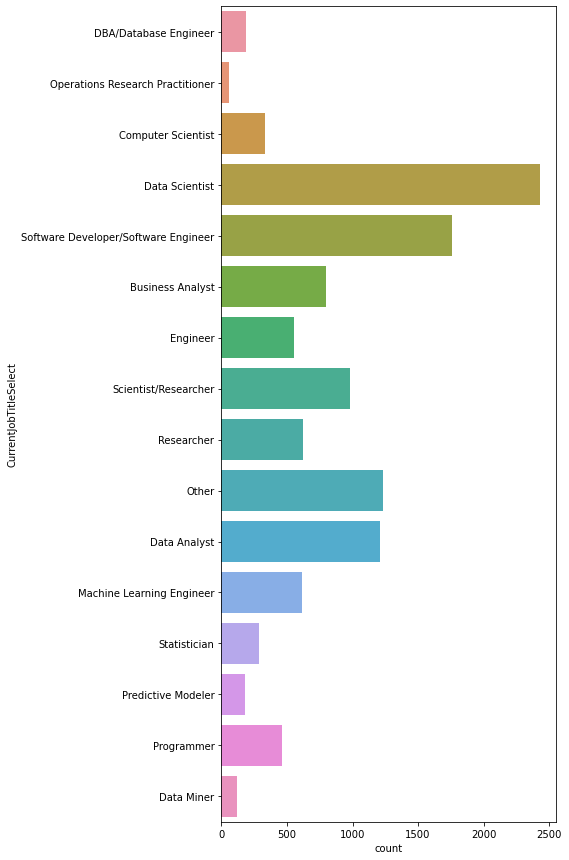

In [41]:
f, ax = plt.subplots(figsize=(6, 15)) #Define size
ax = sns.countplot(y="CurrentJobTitleSelect", data=multi_choice_cat_df)

Very difficult to point out the nth most popular Job Title from the above plot

#### Exercise 1.6

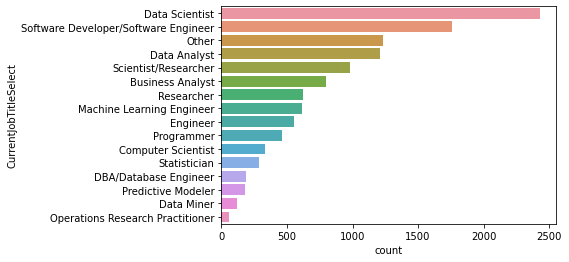

In [50]:
## Order by frequency - descending
sns.countplot(y = 'CurrentJobTitleSelect',
              data = multi_choice_cat_df,
              order = multi_choice_cat_df['CurrentJobTitleSelect'].value_counts().index)

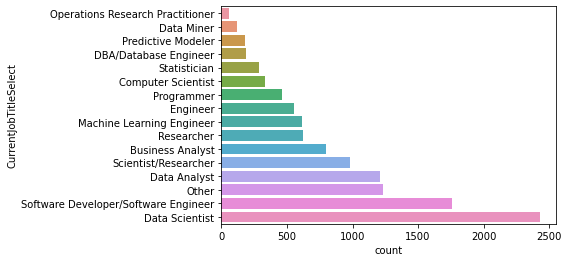

In [52]:
## Order by frequency - ascending
sns.countplot(y = 'CurrentJobTitleSelect',
              data = multi_choice_cat_df,
              order = multi_choice_cat_df['CurrentJobTitleSelect'].value_counts(ascending=True).index)

In [84]:
## Replace counts with percentages
title_perc = (multi_choice_cat_df['CurrentJobTitleSelect']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .rename_axis('CurrentJobTitleSelect')
                     .reset_index())

In [85]:
title_perc.head()

,CurrentJobTitleSelect,percentage
0,Data Scientist,20.566357
1,Software Developer/Software Engineer,14.868977
2,Other,10.422654
3,Data Analyst,10.253593
4,Scientist/Researcher,8.267117


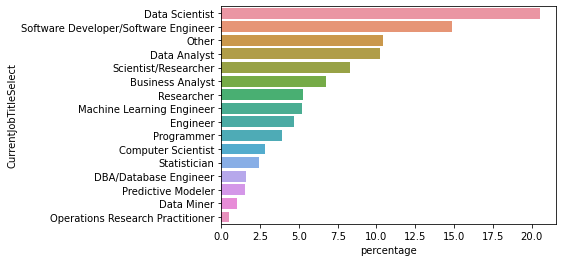

In [87]:
sns.barplot(y="CurrentJobTitleSelect", x="percentage", data=title_perc)

#### Exercise 1.7

### Ordering one variable by another

Analyze the mean age by the Job titles.

In [100]:
## Filter for rows where Age and CurrentJobTitleSelect are both not NA.
filter_df = multi_choice_df[(multi_choice_df['CurrentJobTitleSelect'].notnull()) & (multi_choice_df['Age'].notnull())]

## Group the dataset by CurrentJobTitleSelect. Create a new variable mean_age, that is the mean age for each Job Title.
title_age_df = filter_df.groupby('CurrentJobTitleSelect')['Age'].mean().sort_values().rename_axis('CurrentJobTitleSelect').reset_index()


In [101]:
title_age_df.head()

,CurrentJobTitleSelect,Age
0,Machine Learning Engineer,31.130933
1,Data Analyst,31.555742
2,Programmer,31.735099
3,Software Developer/Software Engineer,32.833622
4,Data Miner,32.991304


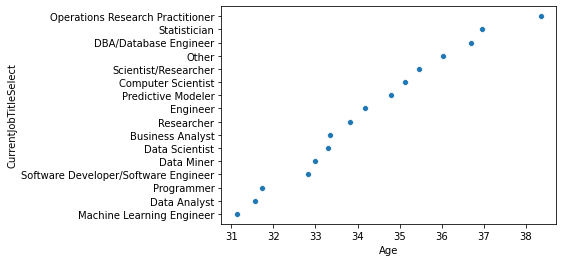

In [102]:
sns.scatterplot(x="Age", y="CurrentJobTitleSelect", data=title_age_df)

### 2. Manipulating Categorical columns

#### Exercise 2.1

Change order of levels in plots - useful in ordinal column case

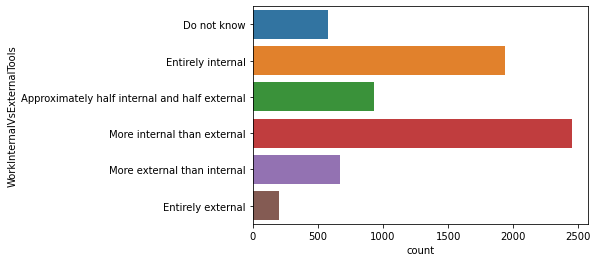

In [105]:
sns.countplot(y="WorkInternalVsExternalTools", data=multi_choice_cat_df)

Note that `nan` are not plotted in a countplot.

Suppose you want the order of the plot to be "Entirely internal", "More internal than external","Approximately half internal and half external", "More external than internal", "Entirely external", "Do not know".

Specify the order in the order argument:

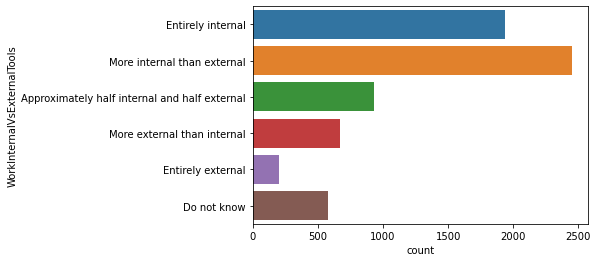

In [107]:
order_list = ["Entirely internal", "More internal than external","Approximately half internal and half external", "More external than internal", "Entirely external", "Do not know"]
sns.countplot(y="WorkInternalVsExternalTools", data=multi_choice_cat_df,order=order_list)

But what do we do when there are many levels in categorical column? We can't write all the levels explicitly. Let's explore this `FormalEducation` column.

Note that in order to consider `nan` in the countplot, we'll have to replace it with a string.

In [115]:
## Replace nan with string 'Missing'
multi_choice_cat_df['FormalEducation'].fillna('Missing', inplace=True)

C:\Users\manishpathak\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [118]:
#Get unique level from the categorical column
education_levels = list(set(multi_choice_cat_df['FormalEducation']))
education_levels

['I prefer not to answer',
 "Some college/university study without earning a bachelor's degree",
 'I did not complete any formal education past high school',
 "Bachelor's degree",
 'Missing',
 'Doctoral degree',
 'Professional degree',
 "Master's degree"]

Move `"I did not complete any formal education past high school"` and `"Some college/university study without earning a bachelor's degree"` to the front. Move `Missing` to last.

In [119]:
# Use insert-pop to move elements in a list at a particular index
education_levels.insert(0, education_levels.pop(education_levels.index("I did not complete any formal education past high school")))
education_levels.insert(1, education_levels.pop(education_levels.index("Some college/university study without earning a bachelor's degree")))
education_levels.insert(len(education_levels)-1, education_levels.pop(education_levels.index("Missing")))

In [120]:
education_levels

['I did not complete any formal education past high school',
 "Some college/university study without earning a bachelor's degree",
 'I prefer not to answer',
 "Bachelor's degree",
 'Doctoral degree',
 'Professional degree',
 "Master's degree",
 'Missing']

Now we can pass the `education_levels` list in the `order` argument.

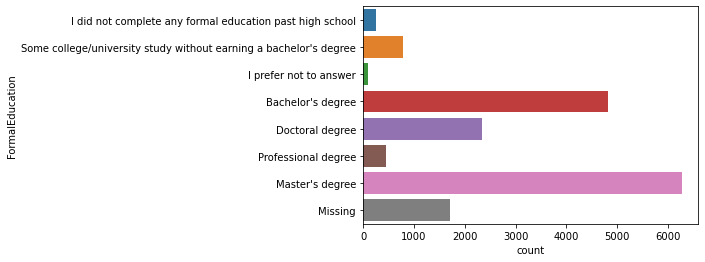

In [121]:
sns.countplot(y="FormalEducation", data=multi_choice_cat_df,order=education_levels)

#### Exercise 2.2

##### Renaming Categorical column's levels
Let's read the FiveThirtyEight Survey Data for this exercise

In [153]:
flight_survey_df = pd.read_csv('D:/Books and Resources/Courses/Categorical Data TidyVerse/fivethirtyeight_flight/datasets_56612_396603_flying-etiquette.csv')
flight_survey_df.head(2)

,RespondentID,How often do you travel by plane?,Do you ever recline your seat when you fly?,How tall are you?,Do you have any children under 18?,"In a row of three seats, who should get to use the two arm rests?","In a row of two seats, who should get to use the middle arm rest?",Who should have control over the window shade?,Is itrude to move to an unsold seat on a plane?,"Generally speaking, is it rude to say more than a few words tothe stranger sitting next to you on a plane?",...,Is itrude to wake a passenger up if you are trying to walk around?,"In general, is itrude to bring a baby on a plane?","In general, is it rude to knowingly bring unruly children on a plane?",Have you ever used personal electronics during take off or landing in violation of a flight attendant's direction?,Have you ever smoked a cigarette in an airplane bathroom when it was against the rules?,Gender,Age,Household Income,Education,Location (Census Region)
0,3436139758,Once a year or less,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3434278696,Once a year or less,About half the time,"6'3""",Yes,The arm rests should be shared,The arm rests should be shared,Everyone in the row should have some say,"No, not rude at all","No, not at all rude",...,"No, not at all rude","No, not at all rude","No, not at all rude",No,No,Male,30-44,NaN,Graduate degree,Pacific


In [155]:
## Let's rename the column 'In a row of three seats, who should get to use the two arm rests?' to 'middle_arm_rest_three'
flight_survey_df.rename(columns={'In a row of three seats, who should get to use the two arm rests?': 'middle_arm_rest_three'},inplace=True)

In [156]:
flight_survey_df['middle_arm_rest_three'].unique()

array([nan, 'The arm rests should be shared',
       'Whoever puts their arm on the arm rest first',
       'The person in the middle seat gets both arm rests',
       'Other (please specify)',
       'The people in the aisle and window seats get both arm rests'],
      dtype=object)

Let's plot the `middle_arm_rest_three` column

In [157]:
#Get Frequency count of each level
flight_survey_df['middle_arm_rest_three'].value_counts()

The arm rests should be shared                                 587
The person in the middle seat gets both arm rests              119
Whoever puts their arm on the arm rest first                    87
Other (please specify)                                          45
The people in the aisle and window seats get both arm rests     18
Name: middle_arm_rest_three, dtype: int64

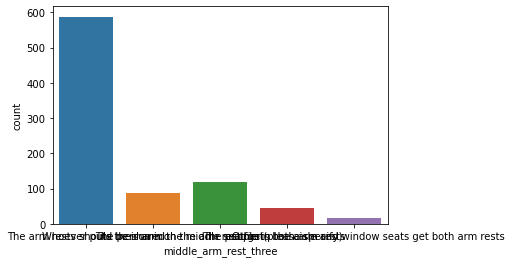

In [158]:
sns.countplot(x="middle_arm_rest_three", data=flight_survey_df)

The `xlabels` are all cluttered, let's flip the bar plot to horizontal.

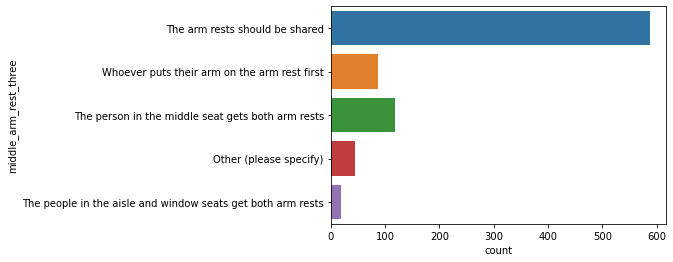

In [159]:
sns.countplot(y="middle_arm_rest_three", data=flight_survey_df)

We can also rename the long-named categories to a shorter named category such that they convey the same meaning

In [161]:
flight_survey_df['middle_arm_rest_three'].replace({'Other (please specify)': 'Other', 
                                    'The arm rests should be shared': 'Everyone should share',
                                   'The people in the aisle and window seats get both arm rests':'Aisle and window people',
                                   'The person in the middle seat gets both arm rests':'Middle person',
                                   'Whoever puts their arm on the arm rest first':'Fastest person'},inplace=True)

In [162]:
flight_survey_df['middle_arm_rest_three'].unique()

array([nan, 'Everyone should share', 'Fastest person', 'Middle person',
       'Other', 'Aisle and window people'], dtype=object)

Let's plot the vertical bar chart, but rotate the `xlabels` by 40 degrees so that they dont overlap. You can also change the plot size using `figsize`

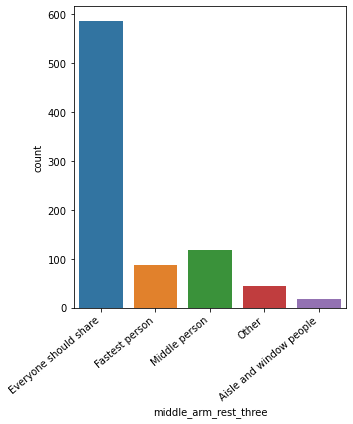

In [172]:
plt.figure(figsize=(5,6))
ax = sns.countplot(x="middle_arm_rest_three", data=flight_survey_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

Nice work cleaning up the graph! Presentation in data science is very important - the easier it is for people to understand your graph, the more effective it will be.

Beware about the spellings of the level you are changing in the above exercise, otherwise the replacement won't happen! Also, you don't have to rename every level.

#### Exercise 2.3
We can represent the frequency/percent-distribution using a pie chart as well for a better data-story telling.

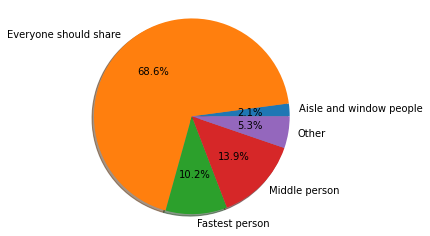

In [173]:
labels = flight_survey_df['middle_arm_rest_three'].astype('category').cat.categories.tolist() #Get the levels
counts = flight_survey_df['middle_arm_rest_three'].value_counts() #Get frequency chart
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is to show the % on plot
ax1.axis('equal')
plt.show()

#### Exercise 2.4

Collapsing your levels - useful when too many level which cant be plotted neatly. For examples in the Flights data there is column named `How tall are you?` which has too many levels. Let's see how we can treat such cases.

In [203]:
flight_survey_df.rename(columns={'How tall are you?': 'Height'},inplace=True) #rename the column to height
flight_survey_df['Height'].value_counts(normalize=True) #No NaN

5'4"              0.092075
5'8"              0.088578
5'7"              0.088578
5'6"              0.087413
5'9"              0.083916
5'5"              0.082751
5'10"             0.078089
6'0"              0.066434
5'11"             0.062937
5'3"              0.055944
5'2"              0.052448
6'2"              0.031469
6'1"              0.030303
5'1"              0.022145
6'3"              0.020979
5'0"              0.019814
Under 5 ft.       0.013986
6'4"              0.012821
6'5"              0.006993
6'6" and above    0.002331
Name: Height, dtype: float64

In [204]:
flights_height_df = flight_survey_df[['Height']] # create a new df which has only heights - for demonstrations
levels_to_merge = ['Under 5 ft.','5\'1"','5\'2"','5\'3"','5\'4"','5\'5"'] #level that we want to merge
flights_height_df['Merged_Height'] = np.where( flights_height_df['Height'].isin(levels_to_merge), '"Under 5\`5"',flights_height_df['Height']) 

C:\Users\manishpathak\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [206]:
flights_height_df['Merged_Height'].value_counts(normalize=True)

"Under 5\`5"      0.319347
5'8"              0.088578
5'7"              0.088578
5'6"              0.087413
5'9"              0.083916
5'10"             0.078089
6'0"              0.066434
5'11"             0.062937
6'2"              0.031469
6'1"              0.030303
6'3"              0.020979
5'0"              0.019814
6'4"              0.012821
6'5"              0.006993
6'6" and above    0.002331
Name: Merged_Height, dtype: float64

Feel free to visualize the new clubbed heights now! 

Or we can also keep the top n most occuring heights based on their frequency proportion and club the rest into new category `Other`

In [211]:
height_frequencies_prop = flights_height_df['Height'].value_counts(normalize=True)

condition = height_frequencies_prop< 0.06   # you can define it however you want
mask_obs = height_frequencies_prop[condition].index
mask_dict = dict.fromkeys(mask_obs, 'Other')

flights_height_df['prop_height'] = flights_height_df['Height'].replace(mask_dict) 

C:\Users\manishpathak\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [213]:
flights_height_df['prop_height'].value_counts(normalize=True)

Other    0.269231
5'4"     0.092075
5'8"     0.088578
5'7"     0.088578
5'6"     0.087413
5'9"     0.083916
5'5"     0.082751
5'10"    0.078089
6'0"     0.066434
5'11"    0.062937
Name: prop_height, dtype: float64

The same concept can be extended to retain top n levels and club everything else in `Other` category.

In [230]:
top_n = 3
height_freq = flights_height_df['Height'].value_counts()
mask_obs = height_freq.iloc[top_n:].index
mask_dict = dict.fromkeys(mask_obs, 'Other')
flights_height_df['top_height'] = flights_height_df['Height'].replace(mask_dict) 

C:\Users\manishpathak\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [231]:
flights_height_df['top_height'].value_counts()

Other    627
5'4"      79
5'8"      76
5'7"      76
Name: top_height, dtype: int64

### 3.Creating Factor Variables

#### Tidying Data ; Examining common themed-variables

Let's go back to the MCQ dataset. Let's print out the first few rows of `WorkChallengeFrequencyExplaining` and `WorkChallengeFrequencyIntegration` columns.

In [232]:
multi_choice_df[['WorkChallengeFrequencyExplaining','WorkChallengeFrequencyIntegration']].head()

,WorkChallengeFrequencyExplaining,WorkChallengeFrequencyIntegration
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,Often,Often
4,NaN,NaN


We can tidy up the data such that each row is an observation and each column is a variable. We can re-format the data from wide to long. Instead of having each `WorkChallenge` in a separate column, we can have a column called `WorkChallenge` listing all the Work challenges and one more column called `frequency` listing the frequencies like `Often`, `Most of the time` etc., which are the responses.

Let's select all the column whose name startswith `WorkChallengeFrequency` and store them in a new dataframe called `work_df`. We will use `str.startswith()` to accomplish this task.

In [234]:
work_df = multi_choice_df[multi_choice_df.columns[pd.Series(multi_choice_df.columns).str.startswith('WorkChallengeFrequency')]]

In [235]:
work_df.head()

,WorkChallengeFrequencyPolitics,WorkChallengeFrequencyUnusedResults,WorkChallengeFrequencyUnusefulInstrumenting,WorkChallengeFrequencyDeployment,WorkChallengeFrequencyDirtyData,WorkChallengeFrequencyExplaining,WorkChallengeFrequencyPass,WorkChallengeFrequencyIntegration,WorkChallengeFrequencyTalent,WorkChallengeFrequencyDataFunds,...,WorkChallengeFrequencyTools,WorkChallengeFrequencyExpectations,WorkChallengeFrequencyITCoordination,WorkChallengeFrequencyHiringFunds,WorkChallengeFrequencyPrivacy,WorkChallengeFrequencyScaling,WorkChallengeFrequencyEnvironments,WorkChallengeFrequencyClarity,WorkChallengeFrequencyDataAccess,WorkChallengeFrequencyOtherSelect
0,Rarely,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Often,Most of the time,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Often,Often,Often,Often,Often,Often,NaN,Often,Often,Often,...,Often,Often,NaN,Often,Often,Often,Often,Often,Often,NaN
4,Often,Sometimes,NaN,NaN,NaN,NaN,NaN,NaN,Sometimes,Sometimes,...,NaN,NaN,Sometimes,NaN,Most of the time,NaN,Sometimes,NaN,NaN,NaN


In [286]:
#Use pandas melt() function to convert from wide to long by pivoting on index of df
work_melt_df = work_df.reset_index()
work_melt_df = pd.melt(work_melt_df, id_vars='index', value_vars=[col for col in work_melt_df.columns if col!='index'])

In [287]:
work_melt_df.head()

,index,variable,value
0,0,WorkChallengeFrequencyPolitics,Rarely
1,1,WorkChallengeFrequencyPolitics,NaN
2,2,WorkChallengeFrequencyPolitics,NaN
3,3,WorkChallengeFrequencyPolitics,Often
4,4,WorkChallengeFrequencyPolitics,Often


In [288]:
#Let's drop the index column and rename the other two columns to appropriate names
work_melt_df.drop(['index'],axis=1,inplace=True)
work_melt_df.rename(columns={"variable": "WorkChallenge", "value": "Frequency"},inplace=True)

#Also note that we dont need phrase `WorkChallengeFrequency in each row now since we now have a column named WorkChallenge
work_melt_df['WorkChallenge'] = work_melt_df['WorkChallenge'].str.replace('WorkChallengeFrequency', '')
work_melt_df.head()

,WorkChallenge,Frequency
0,Politics,Rarely
1,Politics,NaN
2,Politics,NaN
3,Politics,Often
4,Politics,Often


In [289]:
work_melt_df['Frequency'].value_counts() #No nan

Often               12714
Sometimes            9185
Most of the time     8504
Rarely               1083
Name: Frequency, dtype: int64

Let's calculate some summary statistics to find what work challenges are faced `Often` and `Most of the time`. 

In [290]:
#remove rows where Frequency is NaN
work_melt_df_nona = work_melt_df[work_melt_df['Frequency'].notnull()]
#dichotomize the `Frequency` column by marking 1 whenver it is `Often` or `Most of the time`
work_melt_df_nona['FreqProbs'] = np.where((work_melt_df_nona['Frequency']=='Often')|(work_melt_df_nona['Frequency']=='Most of the time') ,1,0)

C:\Users\manishpathak\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [291]:
work_melt_df_nona.head()

,WorkChallenge,Frequency,FreqProbs
0,Politics,Rarely,0
3,Politics,Often,1
4,Politics,Often,1
14,Politics,Often,1
15,Politics,Rarely,0


In [292]:
# Frequent problems percentage of different Work Challenges faced.
work_melt_df_nona.groupby(['WorkChallenge'])['FreqProbs'].mean()

WorkChallenge
Clarity                  0.713630
DataAccess               0.704566
DataFunds                0.643908
Deployment               0.523022
DirtyData                0.830470
DomainExpertise          0.679688
Environments             0.663208
Expectations             0.624339
Explaining               0.604416
HiringFunds              0.730381
ITCoordination           0.713430
Integration              0.625514
ML                       0.606536
OtherSelect              0.758123
Pass                     0.445755
Politics                 0.661194
Privacy                  0.609705
Scaling                  0.630252
Talent                   0.708611
Tools                    0.623410
UnusedResults            0.594037
UnusefulInstrumenting    0.560250
Name: FreqProbs, dtype: float64